In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv(r'./height_weight.csv')
data.drop('Gender', axis=1, inplace=True)
data.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


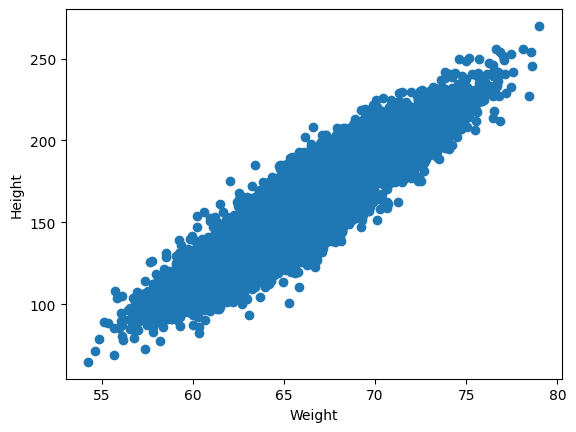

In [3]:
#scatter plot
plt.scatter(x=data.Height, y=data.Weight)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [4]:
# find correalation
data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


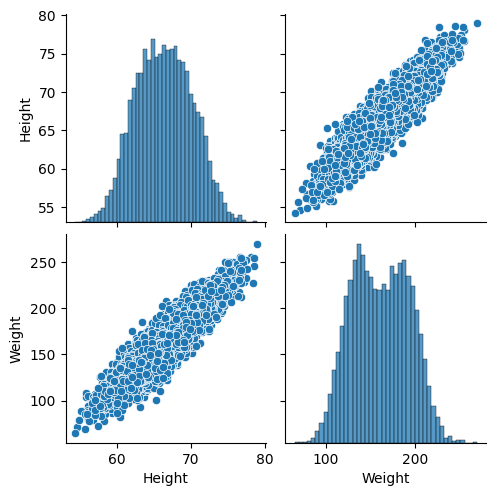

In [5]:
#seaborn for visulaization
import seaborn as sns
sns.pairplot(data)

In [6]:
# independent feature
X = data[['Height']]
y = data['Weight']

In [7]:
print('shape of X: ', X.shape)
print('shape of y: ', y.shape)

shape of X:  (10000, 1)
shape of y:  (10000,)


In [8]:
#train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

In [9]:
print('x train shape : ', X_train.shape)
print('x test shape: ', X_test.shape)

x train shape :  (7500, 1)
x test shape:  (2500, 1)


In [10]:
#standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)

In [11]:
# to keep the test data as unseen and avoid data leakage apply ing tranform only for X_test

X_test_scaled = scalar.transform(X_test)

In [12]:
# simple linear regression
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train_scaled, y_train) # fit works onyl with 2D array

LinearRegression()

In [13]:
print('Coeff or slope: ', regr.coef_[0])
print('intercept : ', regr.intercept_)

Coeff or slope:  29.59862269296967
intercept :  161.23075926318265


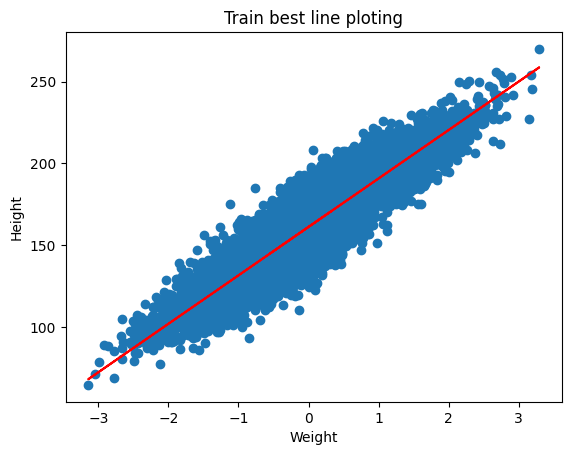

In [14]:
#scatter plot
plt.title('Train best line ploting')
plt.scatter(X_train_scaled, y_train)
plt.plot(X_train_scaled, regr.predict(X_train_scaled), color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

#### prediction of test data
###### $ y = intercept + coeff(X test)$
###### $ y = -349.8029880962076 + 7.7022829561133035(X test)$

In [15]:
# prediction for test data
y_pred = regr.predict(X_test_scaled)

In [16]:
# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r_squared = r2_score(y_test, y_pred)
print('mean_absolute_error(mae) : ', mae)
print('mean_squared_error(mse) : ', mse)
print('root_mean_squared_error(rmse) : ', rmse)
print('R2  : ', r_squared)

mean_absolute_error(mae) :  9.720990891992404
mean_squared_error(mse) :  149.31479307438
root_mean_squared_error(rmse) :  12.21944323913246
R2  :  0.8573532043041168


In [25]:
# adjusted R2
n = len(y_test)
p = X_test.shape[1]
k = X_test.shape
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(adjusted_r_squared)

0.8572960999023169


In [26]:
print(n)
print(p)
print(k)

2500
1
(2500, 1)


In [19]:
# OLS
import statsmodels.api as sm
model  = sm.OLS(y_train, X_train_scaled).fit()
prediction = model.predict(X_test_scaled)
print(prediction)


[ 18.01475046  19.10925704   0.38342516 ... -43.91348812   5.96214028
   9.60413949]


In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              251.3
Date:                Thu, 13 Feb 2025   Prob (F-statistic):                    1.09e-55
Time:                        19:46:41   Log-Likelihood:                         -48785.
No. Observations:                7500   AIC:                                  9.757e+04
Df Residuals:                    7499   BIC:                                  9.758e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            29.5986      1.867     15.852      0.000      25.938      33.259
==============================================================================
Omnibus:                        1.208   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.239
Skew:                           0.028   Prob(JB):                        0.538
Kurtosis:                       2.973   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### prediction for new data

In [21]:
value  = regr.predict(scalar.transform([[72]]))
print("Transformed value for [[72]]:", value)

Transformed value for [[72]]: [204.76138474]


d:\Work_Directory\Machie Learning\.mlvenv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
